## Numpy dictionaries and categorical data

We will introduce a numpy structure called a **dictionary**.

A dictionary represents a mapping between **keys** and **values**. The keys and values are Python objects of any type. We declare a dictionary using curly braces `{}`. Inside we specify the key then its associated value, with the keys and values separated by a colon `:`. Commas `,` are used to separate elements in the dictionary. 

```python
dictionary_name = {key1: value1, key2: value2, key3: value3}
```

For example:

In [1]:
d = {1: 'one', 
     2: 'two', 
     3: 'apple'}

In the above dictionary `d`, we have three **keys** `1`, `2`, `3`, and their respective **values** `'one'`, `'two'` and `'apple'`. 

We can look up elements in a dictionary using the `[ key_name ]` to address the value stored under a key. The syntax looks like:

```python
dictionary_name[key_name]
```

In our example dictionary `d` above, we can call upon the value associated with the key name `1` like so:

```python
d[1]
```

In [2]:
print(d[1], " + ", d[2], " = ", d[3])

one  +  two  =  apple


Elements in a dictionary can be modified or new elements added by using the `dictionary_name[key_name] = value` syntax.

In [3]:
d[3] = 'three'
d[4] = 'four'

print(d[1], " + ", d[2], " = ", d[3])

one  +  two  =  three


Again, the dictionary name, key name, and value must be specified.

Dictionaries are useful for data analysis (including satellite data analysis) because they make it easy to assign **categorical values** to our dataset. Remote sensing can be used to create classification products that use categorical values. These products do not contain continuous values. They use discrete values to represent different classes individual pixels can belong to. 

As an example, the following cells simulate a very simple image containing three different land cover types. Value `1` represents area covered with grass, `2` croplands and `3` city.

First, we import the libraries we want to use.

In [4]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

We will now create a 2-dimensional 100 pixel x 100 pixel numpy array where every value is `1`. This is done using the `numpy.ones` function. Then, we use array indexing to assign part of the area to have the value `2`, and another part to have the value `3`.

In [5]:
# grass = 1
area = np.ones((100,100))

# crops = 2
area[10:60,20:50] = 2

# city = 3
area[70:90,60:80] = 3

area.shape, area.dtype

((100, 100), dtype('float64'))

In [6]:
area

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

We now have a matrix filled with 1s, 2s and 3s. At this point, there is no association between the numbers and the different types of ground cover. 

If we want to show what the area looks like according to the grass/crops/city designation, we might want to give each of the classifications a colour.

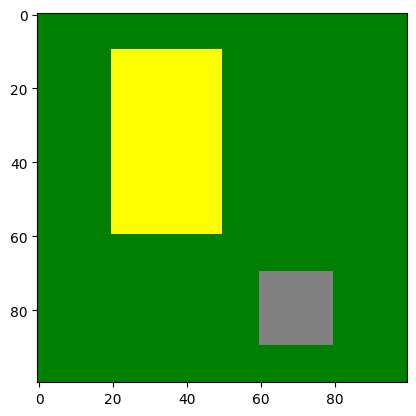

In [7]:
# We map the values to colours
index = {1: 'green', 2: 'yellow', 3: 'grey'}

# Create a discrete colour map
cmap = colors.ListedColormap(index.values())

# Plot
plt.imshow(area, cmap=cmap)

In the case above, every pixel had a value of either `1`, `2` or `3`. What happens if our dataset is incomplete and there is no data in some places?

This is a common problem in real-life datasets. Real datasets can be incomplete and may be missing data at certain times or places. To deal with this, we use the special value known as `NaN`, which stands for **Not a Number**. 

`NaNs` are designated by the numpy `np.nan` function.

In [8]:
arr = np.array([1,2,3,4,5,np.nan,7,8,9], dtype=np.float32)

arr

array([ 1.,  2.,  3.,  4.,  5., nan,  7.,  8.,  9.], dtype=float32)

To compute statistics on arrays containing NaN values, numpy has special versions of common functions such as `mean`, standard deviation `std`, and `sum` that ignore the `NaN` values. For example, the next cell shows the difference between using the usual `mean` function and the `nanmean` function.

The `mean` function cannot handle `NaN` values so it will return `nan`. The `nanmean` function does not include `NaN` values in the calculation, and therefore returns a number value. 

In [9]:
print(np.mean(arr))

print(np.nanmean(arr))

nan
4.875


Note that `NaN` is generally not used as a key in dictionary key-value entries because there are different ways of expressing `NaN` in Python and they are not always equivalent. However, it is still possible to visualise data with `NaNs`; there will be gaps in the image where there is no data.

## Exercises

### 4.1 The harvesting season has arrived and our cropping lands have changed colour to brown. Can you:

#### 4.1.1 Modify the yellow area to contain the new value `4`?
#### 4.1.2 Add a new entry to the `index` dictionary mapping number `4` to the value `brown`.
#### 4.1.3 Plot the area.

In [10]:
# 4.1.1 Modify the yellow area to hold the value 4


In [11]:
# 4.1.2 Add a new key-value pair to index that maps 4 to 'brown'


In [12]:
# 4.1.3 Copy the cmap definition and re-run it to add the new colour

# Plot the area


> **Hint:** If you want to plot the new area, you have to redefine `cmap` so the new value is assigned a colour in the colour map. Copy and paste the `cmap = ...` line from the original plot.

### 4.2 Set `area[20:40, 80:95] = np.nan`. Plot the area now.

In [13]:
# Set the nan area


In [14]:
# Plot the entire area


### 4.3 Find the median of the `area` array from 4.2 using `np.nanmedian`. Does this match your visual interpretation? How does this compare to using `np.median`?

In [15]:
# Use np.nanmedian to find the median of the area
